In [ ]:
!pip install pykeen

In [2]:
from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory

triples_factory = TriplesFactory.from_path('formatted_triples_FINAL.txt')
training, validation, testing = triples_factory.split([0.8, 0.1, 0.1])



result = pipeline(
    training=training,
    validation=validation,
    testing=testing,

    model='transE',
    model_kwargs={
        'embedding_dim': 20,
    },

    optimizer='Adam',
    optimizer_kwargs={
        'lr': 1e-3,
        'weight_decay': 1e-5
    },

    negative_sampler='basic',
    # negative_sampler_kwargs={
    #     'num_negs_per_pos': 1
    # },

    loss='SoftplusLoss',

    training_loop='sLCWA',

    training_kwargs={
        'num_epochs': 150,
        'batch_size': 32,
        'label_smoothing': 0.1
    },

    evaluator_kwargs=  {
        # 'batch_size': 64,
        "filtered": True
    },
    filter_validation_when_testing = True,
)

print(result)


using automatically assigned random_state=1349332655
No random seed is specified. Setting to 2190298758.
No cuda devices were available. The model runs on CPU
Training epochs on cpu: 100%|██████████| 150/150 [04:29<00:00,  1.80s/epoch, loss=0.49, prev_loss=0.49]  
Evaluating on cpu:   0%|          | 0.00/2.21k [00:00<?, ?triple/s]WARNING:torch_max_mem.api:Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 2.21k/2.21k [00:07<00:00, 306triple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 7.32s seconds


PipelineResult(random_seed=2190298758, model=TransE(
  (loss): SoftplusLoss(
    (margin_activation): Softplus(beta=1, threshold=20)
  )
  (interaction): TransEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(7714, 20)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(5, 20)
    )
  )
  (weight_regularizers): ModuleList()
), training=TriplesFactory(num_entities=7714, num_relations=5, create_inverse_triples=False, num_triples=17674, path="/Users/andycaen/Desktop/EHRPipeline/EHRPipeline/semantic_completeness/formatted_triples_FINAL.txt"), training_loop=<pykeen.training.slcwa.SLCWATrainingLoop object at 0x7fc9e85dcbe0>, losses=[2.036353869420926, 1.75668938810959, 1.669085209882712, 1.6020047535301332, 1.5393241486540754, 1.4797362744484845, 1.424180722150406, 1.3727051601703084, 1.3254360870254407, 1.2823200814331635, 1.2426687746323901, 1.2063515809302303, 1.1729475300738867, 1.1

<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='softplus Loss'>

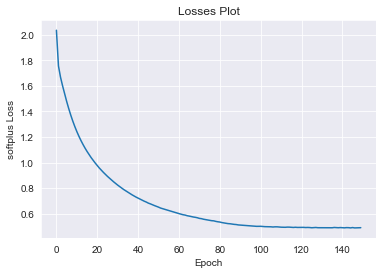

In [3]:
# Plot the training loss by epoch
result.plot_losses()

In [8]:
from pykeen import predict  # or pykeen.models.predict, depending on version

df_predictions = predict.predict_target(
    model=result.model,
    head="Diagnosis/10033/PATIENTS/112578",
    relation="hasCode",
    triples_factory=result.training
).df

# Inspect the top 10
df_predictions.head(10)


,tail_id,score,tail_label
7488,7488,-1.409861,icd9#2859
7482,7482,-1.551415,icd9#25000
7507,7507,-1.562186,icd9#51881
7494,7494,-1.585680,icd9#4019
7514,7514,-1.645640,icd9#5849
7522,7522,-1.793367,icd9#7907
7485,7485,-1.794299,icd9#2762
7505,7505,-1.844175,icd9#5119
7480,7480,-2.269198,icd9#20300
7516,7516,-2.367263,icd9#5939
